In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
db_path = 'data.db'
db = sqlite3.connect(db_path)
table_name = 'test_table'

In [3]:
tasks = pd.read_sql_query(f'select * from "{table_name}"', db)
tasks['completion time'] = tasks['returned'] - tasks['start_submit']
tasks.head()

,run_id,monitor_tag,start_submit,end_submit,returned,workers,tasks_per_trial,trial,app_name,completion time
0,60af2762-6bb0-44f3-9f33-144a7210171b,htex,1.711672e+09,1.711672e+09,1.711672e+09,1,128,1,noop,0.601447
1,6b6907b8-bfc1-4a42-ab27-6b603379a1e8,htex,1.711672e+09,1.711672e+09,1.711672e+09,1,128,1,sleep10ms,1.637057
2,242d3e58-59c7-4330-b475-38a8c9ec020f,htex,1.711672e+09,1.711672e+09,1.711672e+09,1,128,1,sleep100ms,13.090811
3,afad693a-5867-466b-b4c6-a24c812a53aa,diaspora,1.711672e+09,1.711672e+09,1.711672e+09,1,128,1,noop,0.601575
4,adcb4d2e-c7ad-4310-afae-5b5241e782ea,diaspora,1.711672e+09,1.711672e+09,1.711672e+09,1,128,1,sleep10ms,1.631006


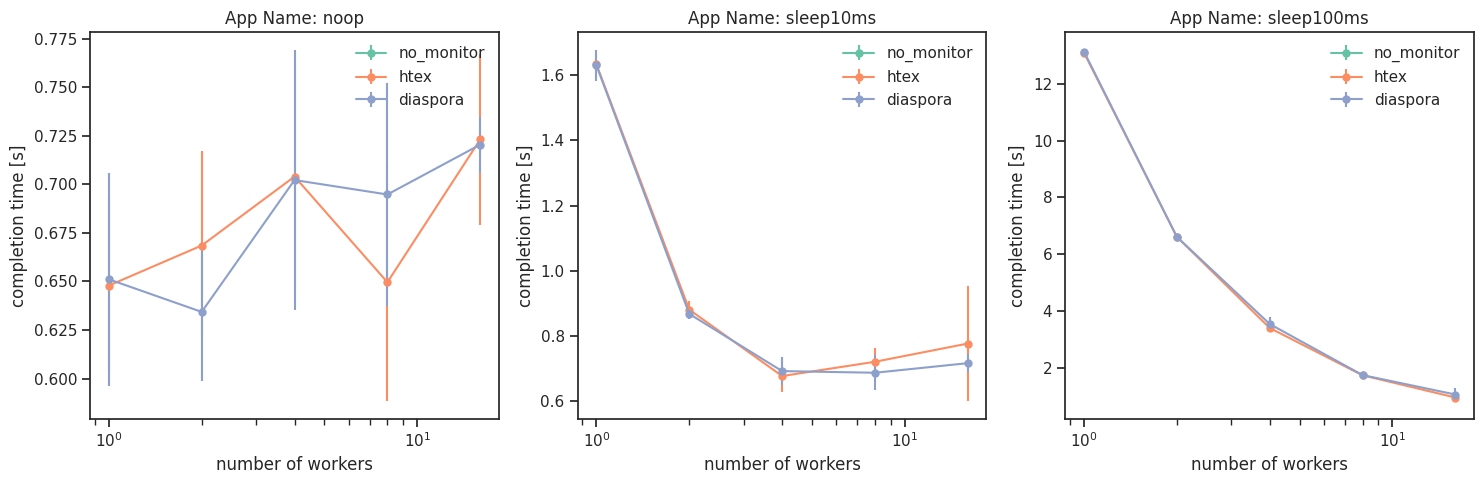

In [4]:
# strong scaling
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['completion time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'completion time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['completion time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('completion time [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')

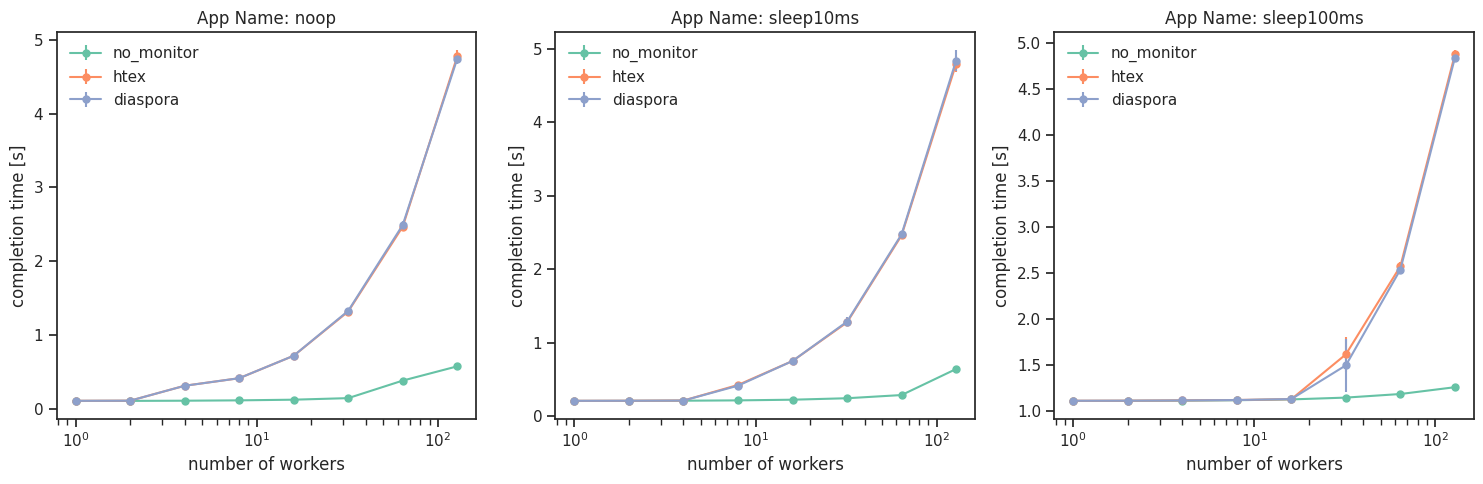

In [6]:
# weak scaling
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['completion time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'completion time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['completion time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('completion time [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')